In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.randint(0, 10, 10000)

In [4]:
h = np.bincount(x)

In [5]:
h

array([1016,  998,  998,  962, 1026,  968, 1041, 1002,  958, 1031])

In [6]:
h = h / h.sum()


In [7]:
h

array([0.1016, 0.0998, 0.0998, 0.0962, 0.1026, 0.0968, 0.1041, 0.1002,
       0.0958, 0.1031])

### Binomial Distribution

In [11]:
# We pass binomial the number of trials (5) and the probability of success for each trial (0.3).
t = np.random.binomial(n=5, p=0.3, size=10000)        
s = np.bincount(t)
s

array([1626, 3631, 3112, 1323,  288,   20])

In [12]:
s / s.sum()

array([0.1626, 0.3631, 0.3112, 0.1323, 0.0288, 0.002 ])

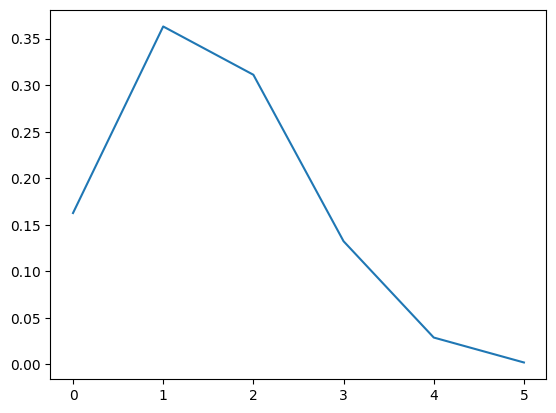

In [17]:
plt.plot(s/s.sum())


In [18]:
# we can see that the probability of success dicrease

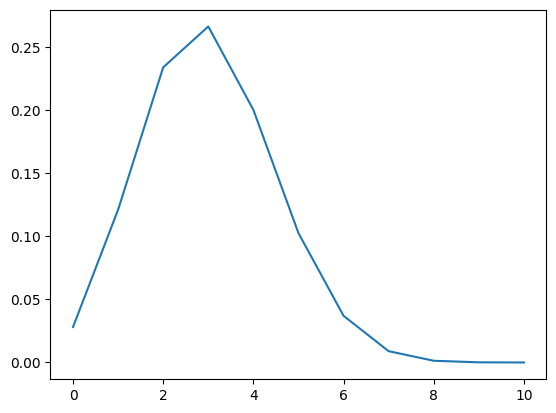

In [26]:
# let's try with larger sample size
t = np.random.binomial(n=10, p=0.3, size=1000000)
s = np.bincount(t)
s = s / s.sum()
plt.plot(s)

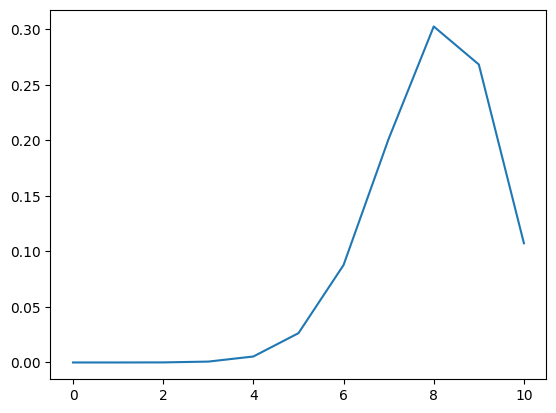

In [27]:
# let's try with larger sample size
t = np.random.binomial(n=10, p=0.8, size=1000000)
s = np.bincount(t)
s = s / s.sum()
plt.plot(s)

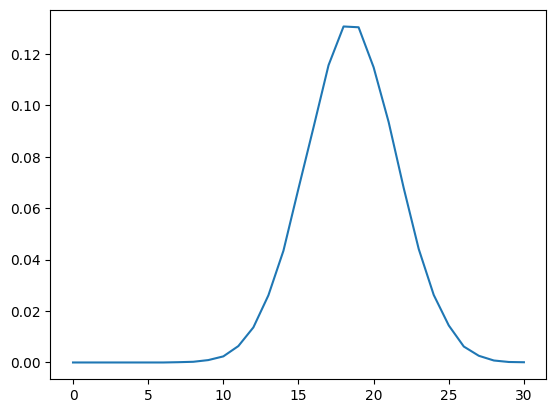

In [25]:
t = np.random.binomial(n=37, p=0.5, size=100000)
s = np.bincount(t)
s = s / s.sum()
plt.plot(s)

#### Observation:
We can see that if the probability of our desired outcome is 0.5, the binomial distribution, and our sample size is large enough we get a normal distribution. However, lower or higher probability makes the distribution skewed to left or right

### The Bernoulli Distribution:
The Bernoulli distribution is a special case of the binomial distribution. In this
case, we fix n = 1.

In [33]:
t = np.random.binomial(n=1, p=0.5, size=100000) # A fair coin toss
s = np.bincount(t)
s

array([50026, 49974])

In [32]:
t = np.random.binomial(n=1, p=0.3, size=100000) # A biased coin toss
s = np.bincount(t)
s

array([70199, 29801])

### The Poisson Distribution
Sometimes, we don’t know the probability of an event happening for any
particular trial. Instead, we might know the average number of events that
happen over some interval, say of time. This is Poisson Distribution.

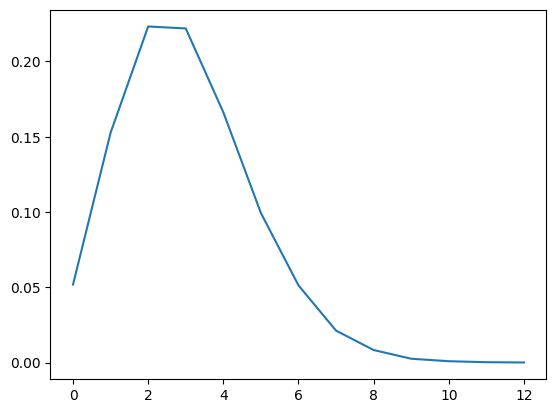

In [44]:
t = np.random.poisson(lam=3, size=100000) # Assuming on average the event happens 3 times.
s = np.bincount(t)
s = s / s.sum()
plt.plot(s)

We can see that the Poisson distribution peaks near the `lambda`

### Fast Loaded Dice Roller

The Fast Loaded Dice Roller (FLDR) lets us specify an arbitrary discrete
distribution and then draw samples from it. The code is in Python and freely
available. (See https://github.com/probcomp/fast-loaded-dice-roller/.)

In [51]:
from fldrf import fldr_preprocess_float_c
from fldr import fldr_sample

In [52]:
x = fldr_preprocess_float_c([0.6,0.2,0.1,0.1])
t = [fldr_sample(x) for i in range(1000)]

In [54]:
np.bincount(t)

array([608, 197,  90, 105])

Let’s use the histogram of the raccoon face image we used earlier to
see if FLDR will follow a more complex distribution.

In [58]:
from scipy.misc import face
im = face(gray=True)
b = np.bincount(im.ravel(), minlength=256)
b = b / b.sum()
x = fldr_preprocess_float_c(list(b))
t = [fldr_sample(x) for i in range(25000)]
q = np.bincount(t, minlength=256)
q = q / q.sum()

/tmp/ipykernel_23767/1144547886.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = face(gray=True)


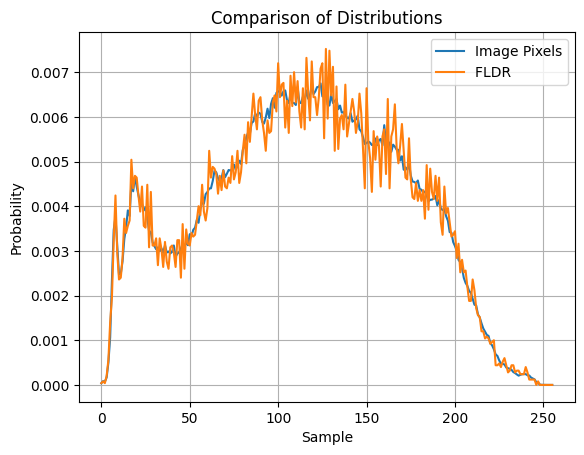

In [59]:
x = np.arange(256)  # Intensity values (0 to 255)

plt.plot(x, b, label='Image Pixels')
plt.plot(x, q, label='FLDR ')
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Comparison of Distributions')
plt.legend()
plt.grid(True)
plt.show()

### Continuous Probability Distributions
The porbability of a specific value is zero, rather it is calculated in terms of a range.

In [64]:
N = 10000000
B = 100


# Uniform distribution: values between 0 and 1
t = np.random.random(N)
u = np.histogram(t, bins=B)[0]
u = u / u.sum()

# Normal distribution: bell curve around 0 with standard deviation 1
t = np.random.normal(0, 1, size=N)
n = np.histogram(t, bins=B)[0]
n = n / n.sum()

# Gamma distribution: skewed positive values
t = np.random.gamma(5.0, size=N)
g = np.histogram(t, bins=B)[0]
g = g / g.sum()

# Beta distribution: bounded values between 0 and 1 with a specific shape
t = np.random.beta(5, 2, size=N)
b = np.histogram(t, bins=B)[0]
b = b / b.sum()

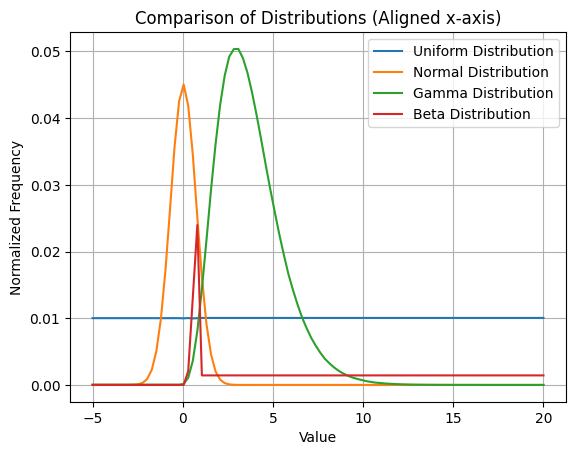

In [69]:
x_common = np.linspace(-5, 20, B)  # Uniform x-axis range for visualization

plt.plot(x_common, np.interp(x_common, np.linspace(0, 1, len(u)), u), label='Uniform Distribution')
plt.plot(x_common, np.interp(x_common, np.linspace(-4, 4, len(n)), n), label='Normal Distribution')
plt.plot(x_common, np.interp(x_common, np.linspace(0, 20, len(g)), g), label='Gamma Distribution')
plt.plot(x_common, np.interp(x_common, np.linspace(0, 1, len(b)), b), label='Beta Distribution')

# Add labels, legend, and title
plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Comparison of Distributions (Aligned x-axis)')
plt.legend()
plt.grid(True)
plt.show()


### Central Limit Theorem
From any distribution, if we take large enough sample of size N for many times and if we plot the mean of each batch we get a normal distribution regardless of the underlying distribution we initially sampled from.

In [ ]:
M = 10000
m = np.zeros(M)
for i in range(M):
    t = np.random.beta(a=5, b=2, size=M) # Sampling from beta distribution
    m[i] =  t.mean()

np.histogram(m)

(array([  27,  141,  659, 1583, 2621, 2632, 1581,  592,  142,   22]),
 array([0.70866208, 0.70978974, 0.71091739, 0.71204505, 0.7131727 ,
        0.71430035, 0.71542801, 0.71655566, 0.71768331, 0.71881097,
        0.71993862]))

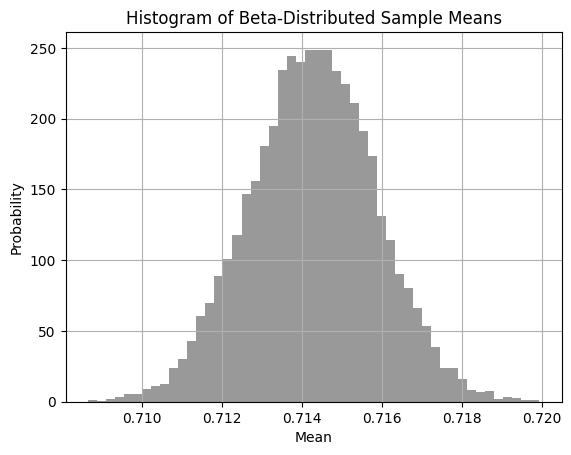

In [74]:
plt.hist(m, bins=50, density=True, color='gray', alpha=0.8)  # Histogram with 50 bins, normalized
plt.xlabel('Mean')
plt.ylabel('Probability')
plt.title('Histogram of Beta-Distributed Sample Means')
plt.grid(True)
plt.show()

We can see that even though we sampled from a beta distribution, the means following a normal distribution. We can further verify this using our given distribution as below>

In [75]:
from fldrf import fldr_preprocess_float_c
from fldr import fldr_sample
z = fldr_preprocess_float_c([0.2,0.6,0.1,0.1,0.1]) # Giving our own distribution, left heavy here
m = np.zeros(M)

for i in range(M):
    t = np.array([fldr_sample(z) for i in range(M)])
    m[i] =  t.mean()


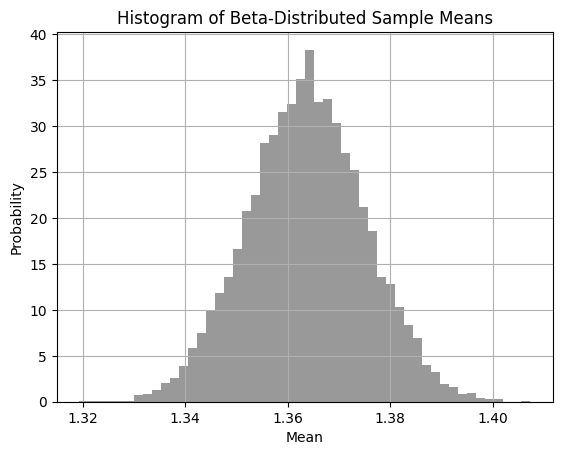

In [76]:
plt.hist(m, bins=50, density=True, color='gray', alpha=0.8)  # Histogram with 50 bins, normalized
plt.xlabel('Mean')
plt.ylabel('Probability')
plt.title('Histogram of Beta-Distributed Sample Means')
plt.grid(True)
plt.show()

#### But our initial distribution z is below.

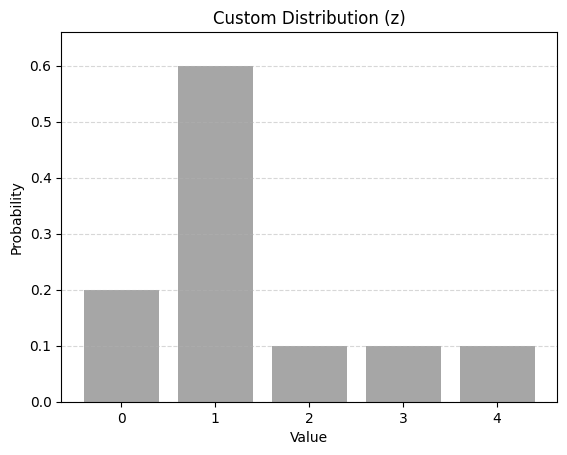

In [82]:
x_values = np.arange(len(z))  # x-axis values: [0, 1, 2, 3, 4]

# Create the bar chart
plt.bar(x_values, z, color='gray', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Custom Distribution (z)')
plt.xticks(x_values)  # Ensure x-axis labels match the values [0, 1, 2, 3, 4]
plt.ylim(0, max(z) * 1.1)  # Adjust y-axis for better spacing above bars
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### The Law of Large Numbers
If the size of our sample icreases, the sample mean m approaches the population mean Mu

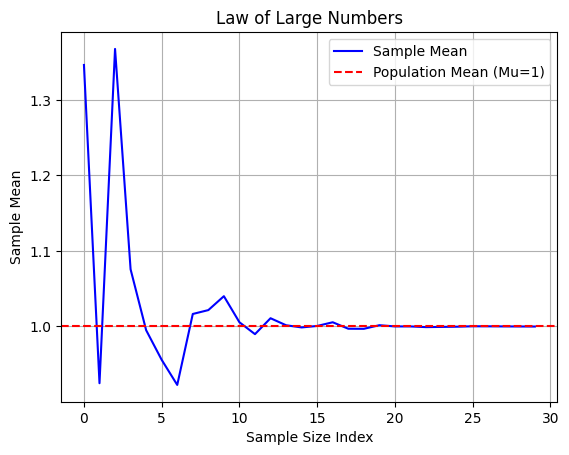

In [87]:
m = []
for n in np.linspace(1, 8, 30):
    t = np.random.normal(1,1,size=int((10**n))) # Our sample size are increasing from 10^1 to 10^8
    m.append(t.mean())


plt.plot(m, linestyle='-', color='blue', label='Sample Mean')
plt.axhline(1, color='red', linestyle='--', label='Population Mean (Mu=1)')  # Add a horizontal line at mean 1
plt.xlabel('Sample Size Index')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers')
plt.legend()
plt.grid(True)
plt.show()